In [ ]:
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 6.0 MB/s eta 0:00:00


In [ ]:
# Initiate the model setup
# Importing necessary libraries and packages

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import datasets, layers, models
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

import visualkeras
from PIL import ImageFont
#font = ImageFont.truetype("arial.ttf", 12)

import warnings
warnings.filterwarnings('ignore')

print("Tensorflow version:",tf.__version__)
#print("Keras version:",keras.__version__)

Tensorflow version: 2.15.0


In [ ]:
# For security purposes
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [ ]:
# Loading the CIFAR-10 dataset using Keras
from tensorflow.keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
# Displaying the shapes of input data and labels
print('X_train Shape: {}'.format(X_train.shape))  # Input data
print('X_test Shape: {}'.format(X_test.shape))
print('Y_train Shape: {}'.format(Y_train.shape))  # Labels
print('Y_test Shape: {}'.format(Y_test.shape))
# The result is in the format (sample, width, height, color)


X_train Shape: (50000, 32, 32, 3)
X_test Shape: (10000, 32, 32, 3)
Y_train Shape: (50000, 1)
Y_test Shape: (10000, 1)


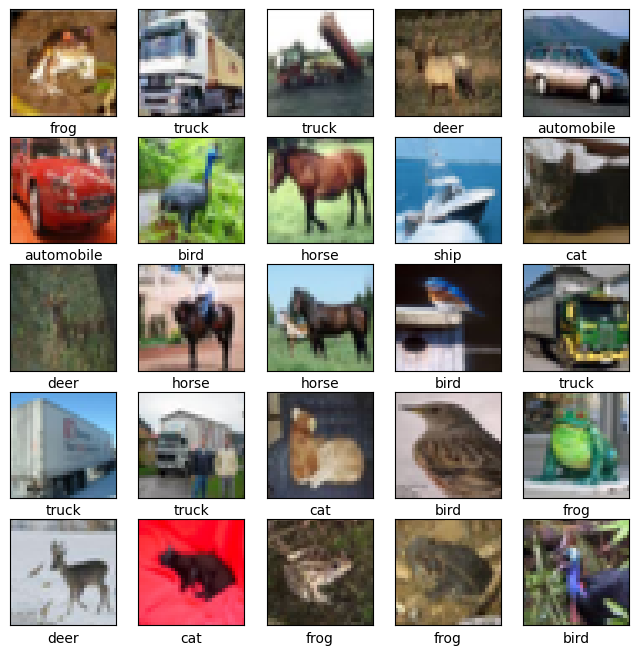

In [ ]:
# Validating the dataset visually
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(8, 8))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    # Using an additional index due to CIFAR labels being arrays
    plt.xlabel(class_names[Y_train[i][0]])
plt.show()


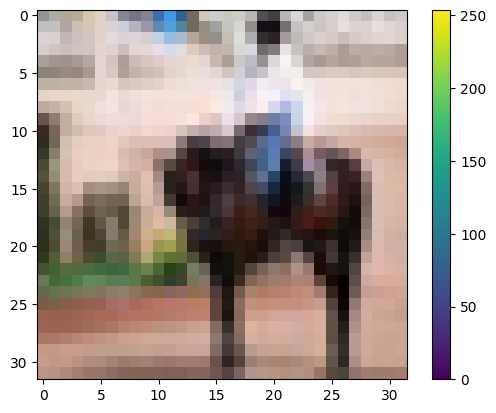

In [ ]:
plt.figure()
plt.imshow(X_train[11])
plt.colorbar()

In [ ]:
# Normalizing to scale pixel values
X_train = X_train / 255
X_test = X_test / 255

# One-Hot-Encoding to categorize into 10 classes
Y_train_en = to_categorical(Y_train, 10)
Y_test_en = to_categorical(Y_test, 10)


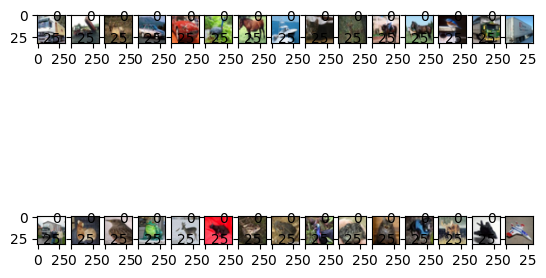

In [ ]:
# Visualizing the data
for i in range(1, 31):
    plt.subplot(2, 15, i)
    plt.imshow(X_train[i])

In [ ]:
from tensorflow.keras import datasets, layers, models

# Creating a base model for a simple CNN
model = models.Sequential()
# Convolution is the process of using a small matrix (kernel) to slide over the input image,
# computing dot products with overlapping regions, and creating feature maps.
model.add(layers.Conv2D(32, (4, 4), input_shape=(32, 32, 3), activation='relu'))
# MaxPooling reduces the dimensions (width and height) of the input feature maps while retaining essential information.
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(32, (4, 4), input_shape=(32, 32, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
# Flatten is a layer that converts a 2D matrix into a 1D vector.
model.add(layers.Flatten())
# Dense represents a fully connected neuron layer.
model.add(layers.Dense(128, activation='relu'))  # ReLU saves negative values as 0
# Output layer with softmax activation for probability distribution.
model.add(layers.Dense(10, activation='softmax'))
# Adam optimizer calculates an adaptive learning rate for each parameter, aiding in faster convergence during training.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
model.summary()
history = model.fit(X_train, Y_train_en, epochs = 30, verbose=1,validation_data=(X_test,Y_test_en))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               102528    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

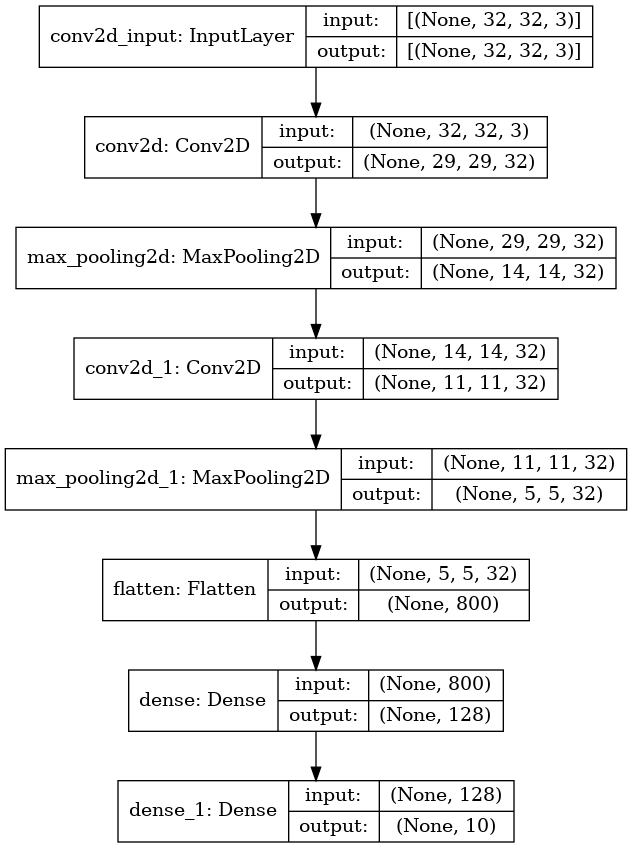

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)

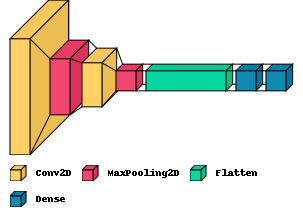

In [ ]:
visualkeras.layered_view(model, legend=True)

In [ ]:
evaluation = model.evaluate(X_test, Y_test_en)
print('Test Accuracy of Base Model: {}'.format(evaluation[1]))

313/313 [==============================] - 5s 13ms/step - loss: 2.5051 - accuracy: 0.6566
Test Accuracy of Base Model: 0.6565999984741211


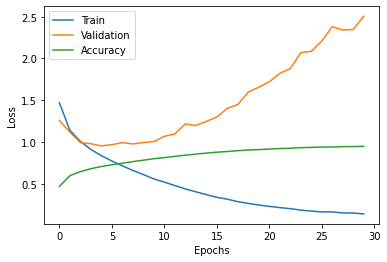

In [ ]:
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.plot(history.history['accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation', 'Accuracy'])
    plt.show()

plot_loss(history)
# Overfitting observed, consider adding dropout or early stopping

In [ ]:
# Model_1 with Dropouts to prevent overfitting
from tensorflow.keras import datasets, layers, models

model_1 = models.Sequential()
model_1.add(layers.Conv2D(64, (4, 4), input_shape=(32, 32, 3), activation='relu'))
model_1.add(layers.MaxPooling2D(pool_size=(2, 2)))
model_1.add(layers.Dropout(0.5))
model_1.add(layers.Conv2D(64, (4, 4), input_shape=(32, 32, 3), activation='relu'))
model_1.add(layers.MaxPooling2D(pool_size=(2, 2)))
model_1.add(layers.Dropout(0.25))  # 25% reduction of neurons
model_1.add(layers.Flatten())
model_1.add(layers.Dense(256, activation='relu'))
model_1.add(layers.Dense(10, activation='softmax'))
model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model_1.summary()
history_1 = model_1.fit(X_train, Y_train_en, epochs = 50, verbose=1, validation_data=(X_test,Y_test_en))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 29, 29, 64)        3136      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        65600     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)             

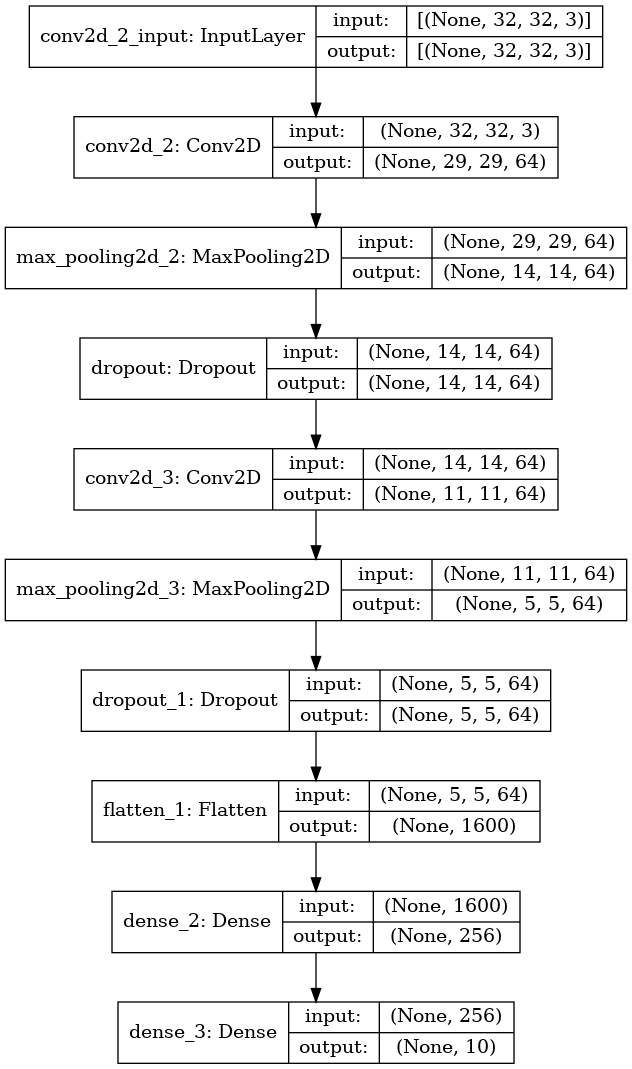

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_1, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)

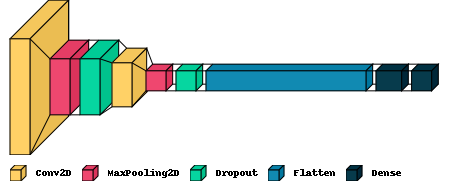

In [ ]:
visualkeras.layered_view(model_1, legend=True)

In [ ]:
evaluation = model_1.evaluate(X_test, Y_test_en)
print('Test Accuracy of Model_1(with Dropouts): {}'.format(evaluation[1]))

313/313 [==============================] - 4s 11ms/step - loss: 1.0879 - accuracy: 0.7127
Test Accuracy of Model_1(with Dropouts): 0.7127000093460083


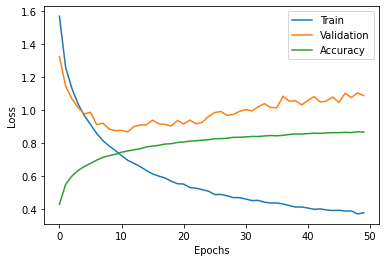

In [ ]:
def plotloss(history_1):
    plt.plot(history_1.history['loss'])
    plt.plot(history_1.history['val_loss'])
    plt.plot(history_1.history['accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation', 'Accuracy'])
    plt.show()
plotloss(history_1)

In [ ]:
# After running model_1 with 50 Epochs, we observe an improvement in validation accuracy from 64.76% to 70.96%, with a decrease in validation loss from 2.5051 to 1.0879.
# To enhance complexity, additional features are added in model_2 with increased layers and dropout set to 0.4.

from tensorflow.keras import datasets, layers, models

model_2 = models.Sequential()
model_2.add(layers.Conv2D(64, (4, 4), input_shape=(32, 32, 3), activation='relu'))
model_2.add(layers.Conv2D(64, (4, 4), input_shape=(32, 32, 3), activation='relu'))
model_2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model_2.add(layers.Dropout(0.4))
model_2.add(layers.Conv2D(128, (4, 4), input_shape=(32, 32, 3), activation='relu'))
model_2.add(layers.Conv2D(128, (4, 4), input_shape=(32, 32, 3), activation='relu'))
model_2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model_2.add(layers.Dropout(0.4))
model_2.add(layers.Flatten())
model_2.add(layers.Dense(1024, activation='relu'))
model_2.add(layers.Dense(1024, activation='relu'))
model_2.add(layers.Dense(units=10, activation='softmax'))
model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model_2.summary()
history_2 = model_2.fit(X_train, Y_train_en, epochs = 100, verbose=1, validation_data=(X_test,Y_test_en))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 29, 29, 64)        3136      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 64)        65600     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 128)       131200    
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 128)         262272    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 128)        

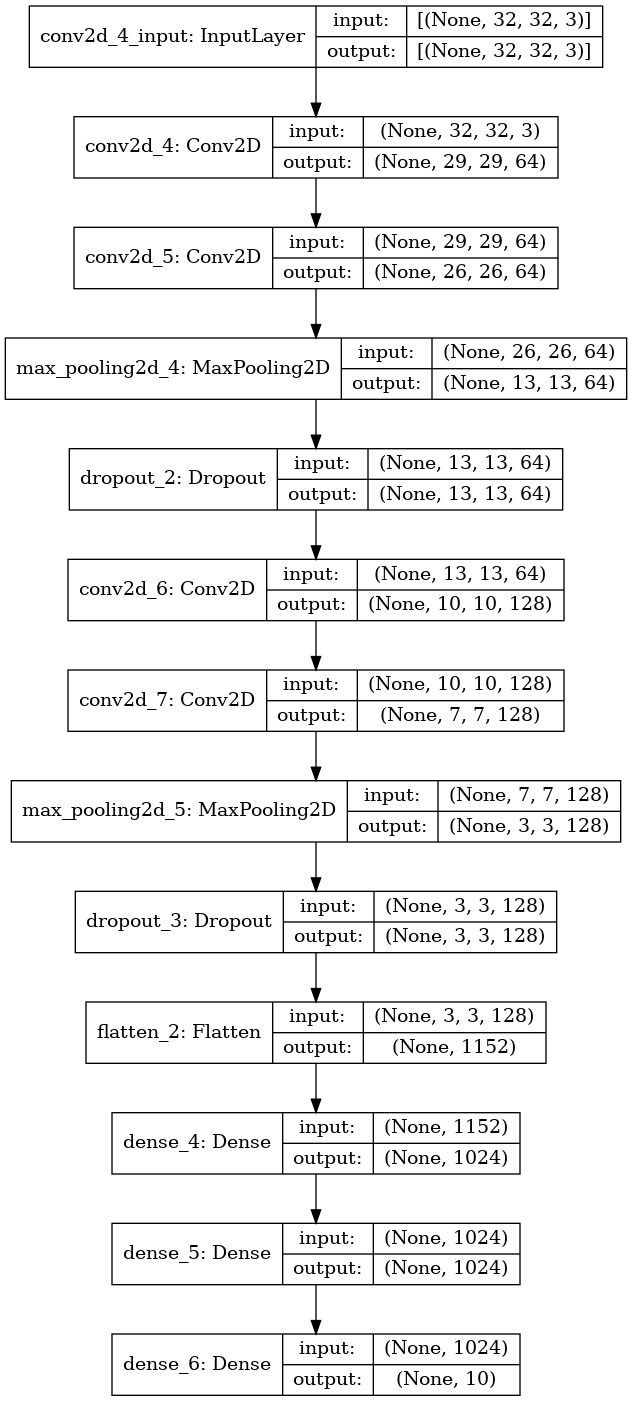

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_2, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
evaluation = model_2.evaluate(X_test, Y_test_en)
print('Test Accuracy of Model_2 (with additional filters): {}'.format(evaluation[1]))

313/313 [==============================] - 5s 15ms/step - loss: 0.8146 - accuracy: 0.7476
Test Accuracy of Model_2(with more  filters): 0.7476000189781189


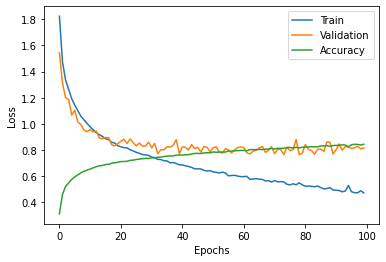

In [ ]:
def plot_loss(history_2):
    plt.plot(history_2.history['loss'])
    plt.plot(history_2.history['val_loss'])
    plt.plot(history_2.history['accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation', 'Accuracy'])
    plt.show()

plot_loss(history_2)

In [ ]:
# Model_3 with Batch Normalization, aiming to improve accuracy from 71.2% to 74.76%
# Scaling to have zero mean and unit variance, altering input distribution
model_3 = models.Sequential()
model_3.add(layers.Conv2D(64, (4, 4), input_shape=(32, 32, 3), activation='relu', padding='same'))
model_3.add(BatchNormalization())
model_3.add(Conv2D(64, (4, 4), input_shape=(32, 32, 3), activation='relu', padding='same'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.2))
model_3.add(Conv2D(128, (4, 4), input_shape=(32, 32, 3), activation='relu', padding='same'))
model_3.add(BatchNormalization())
model_3.add(Conv2D(128, (4, 4), input_shape=(32, 32, 3), activation='relu', padding='same'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))
model_3.add(Conv2D(128, (4, 4), input_shape=(32, 32, 3), activation='relu', padding='same'))
model_3.add(BatchNormalization())
model_3.add(Conv2D(128, (4, 4), input_shape=(32, 32, 3), activation='relu', padding='same'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.35))
model_3.add(Flatten())
model_3.add(Dense(256, activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))
model_3.add(Dense(10, activation='softmax'))
model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model_3.summary()
history_3 = model_3.fit(X_train, Y_train_en, epochs = 100, verbose = 1, validation_data = (X_test, Y_test_en))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 64)        3136      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 64)        65600     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 128)      

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1563/1563 [==============================] - 126s 81ms/step - loss: 0.0544 - accuracy: 0.9809 - val_loss: 0.5786 - val_accuracy: 0.8761
Epoch 50/100
1563/1563 [==============================] - 126s 81ms/step - loss: 0.0531 - accuracy: 0.9824 - val_loss: 0.5664 - val_accuracy: 0.8722
Epoch 51/100
1563/1563 [==============================] - 126s 81ms/step - loss: 0.0617 - accuracy: 0.9788 - val_loss: 0.5778 - val_accuracy: 0.8757
Epoch 52/100
1563/1563 [==============================] - 125s 80ms/step - loss: 0.0538 - accuracy: 0.9816 - val_loss: 0.5988 - val_accuracy: 0.8693
Epoch 53/100
1563/1563 [==============================] - 125s 80ms/step - loss: 0.0524 - accuracy: 0.9818 - val_loss: 0.5798 - val_accuracy: 0.8733
Epoch 54/100
1563/1563 [==============================] - 125s 80ms/step - loss: 0.0512 - accuracy: 0.9834 - val_loss: 0.6179 - val_accuracy: 0.8683
Epoch 55/100
1563/1563 [==============================] - 125s 80ms/step - loss: 0.0520 - accuracy: 0.9829 - val_loss: 

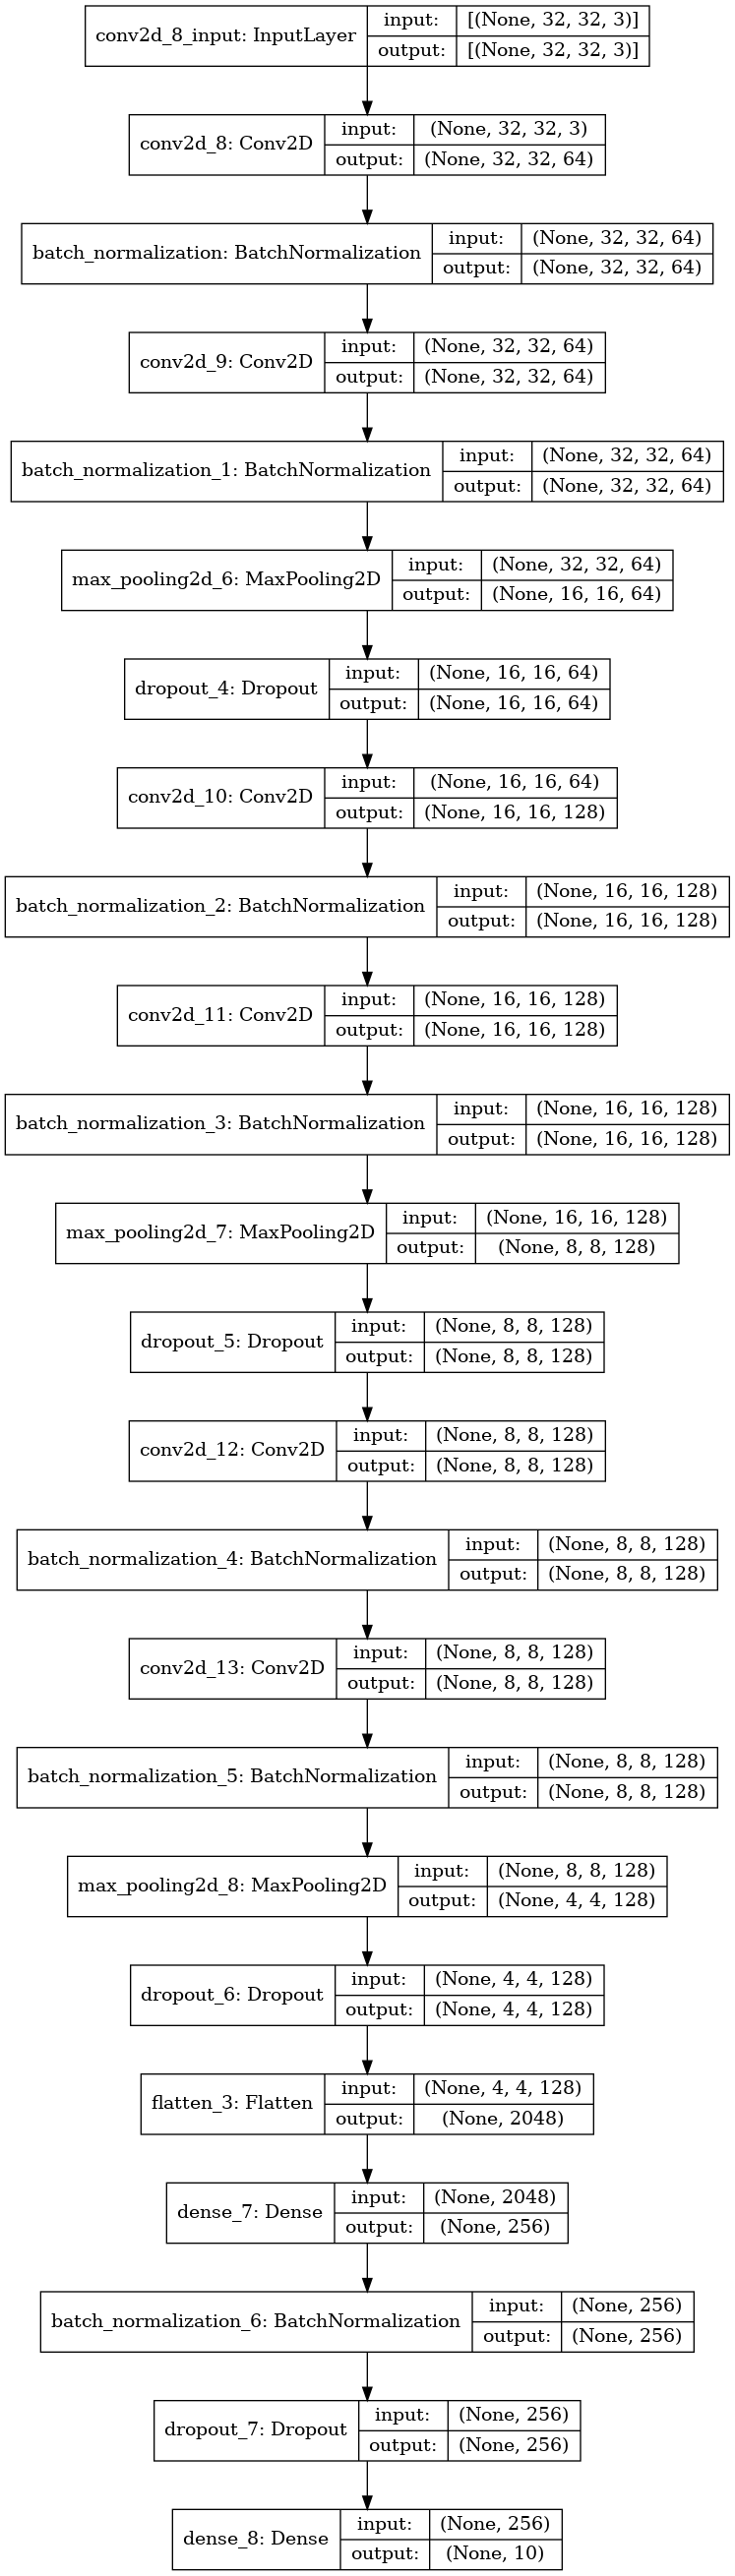

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_3, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)

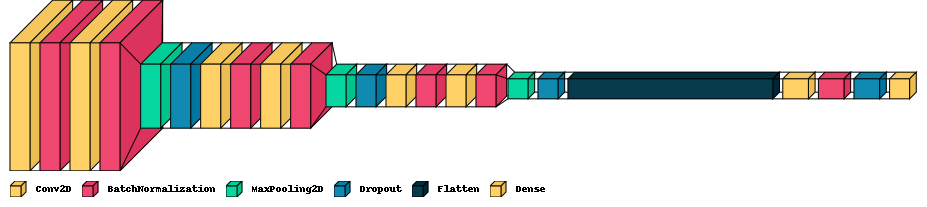

In [ ]:
visualkeras.layered_view(model_3, legend=True)

In [ ]:
evaluation = model_3.evaluate(X_test, Y_test_en)
print('Test Accuracy of Model_3 (with Batch Normalization): {}'.format(evaluation[1]))

313/313 [==============================] - 6s 20ms/step - loss: 0.6328 - accuracy: 0.8790
Test Accuracy of Model_3 (with Batch Normalization): 0.8790000081062317


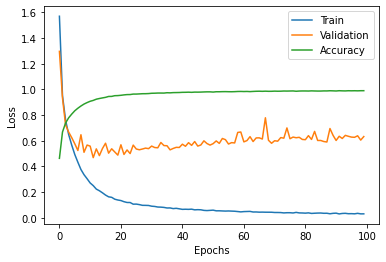

In [ ]:
def plotloss(history_3):
    plt.plot(history_3.history['loss'])
    plt.plot(history_3.history['val_loss'])
    plt.plot(history_3.history['accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation', 'Accuracy'])
    plt.show()
plotloss(history_3)